Your team is experimenting with a digit recognition system (similar to classifying handwritten forms or invoice numbers). You need a basic neural network model to classify images.

Load the digits dataset (or a similar image-based dataset).

Scale or normalize features as needed (e.g., pixels in the range [0,1]) and split into training and testing sets.

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import StandardScaler, OneHotEncoder, TargetEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

# Set random seeds for reproducibility
import random
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

Load the digits dataset (or a similar image-based dataset).

Scale or normalize features as needed (e.g., pixels in the range [0,1]) and split into training and testing sets.

In [9]:
from sklearn.datasets import load_digits

digits = load_digits()
X_digits = digits.data / 16.0       # normalize feature (pixels) in the range [0-1]
y_digits = digits.target

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.2, random_state=42)

Create a sequential model with hidden layers of reasonable size (e.g., 128, 64 units).

Use an activation function (relu, tanh, or sigmoid) and monitor validation accuracy to see which yields the best result.

In [20]:
import tensorflow as tf
from keras import layers

activation = ['relu', 'tanh', 'sigmoid']        # list of activation functions to try
                               
def create_model(input_dim):
    models = {}             # dictionary to store models
    histories = {}          # dictionary to store training histories

    for act in activation:
        model = tf.keras.Sequential([
            tf.keras.Input(shape=(input_dim,)), 
            layers.Dense(128, activation=act, input_shape=(64,)),   # first hidden layer with 128 neurons
            layers.Dense(64, activation=act),                       # second hidden layer with 64 neurons
            layers.Dense(10, activation='softmax')                  # output layer with 10 output classes (digits 0-9)
        ])
        
        model.compile(
            optimizer='adam',                           # automatically adjusts learning rate for each parameter
                                                        # uses moving average of gradients (momentum) to accelerate learning in the right direction
            loss='sparse_categorical_crossentropy',     # suitable when labels are integers
            metrics=['accuracy']
            )
        
        history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=32, verbose=1)

        models[act] = model
        histories[act] = history

    return models, histories

# create and train models with different activation functions
all_models, all_histories = create_model(X_train.shape[1])

for act in activation:
    all_models[act].summary()

Epoch 1/30


c:\Users\jtlee\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4154 - loss: 2.0262 - val_accuracy: 0.7972 - val_loss: 1.2284
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8462 - loss: 0.9517 - val_accuracy: 0.9000 - val_loss: 0.4893
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9256 - loss: 0.4167 - val_accuracy: 0.9278 - val_loss: 0.3033
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9412 - loss: 0.2672 - val_accuracy: 0.9333 - val_loss: 0.2356
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9477 - loss: 0.2034 - val_accuracy: 0.9444 - val_loss: 0.1983
Epoch 6/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9556 - loss: 0.1668 - val_accuracy: 0.9500 - val_loss: 0.1739
Epoch 7/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9631 - loss: 0.1405 - val_accuracy: 0.9528 - val_loss: 0.1557
Epoch 8/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9677 - loss: 0.1201 - val_accuracy: 0.9556 - val_loss: 0.1408
Epo

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_66 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,680 (201.88 KB)

 Trainable params: 17,226 (67.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 34,454 (134.59 KB)

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_69 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,680 (201.88 KB)

 Trainable params: 17,226 (67.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 34,454 (134.59 KB)

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_72 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,680 (201.88 KB)

 Trainable params: 17,226 (67.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 34,454 (134.59 KB)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9839 - loss: 0.0854 
relu Test Accuracy: 0.9722


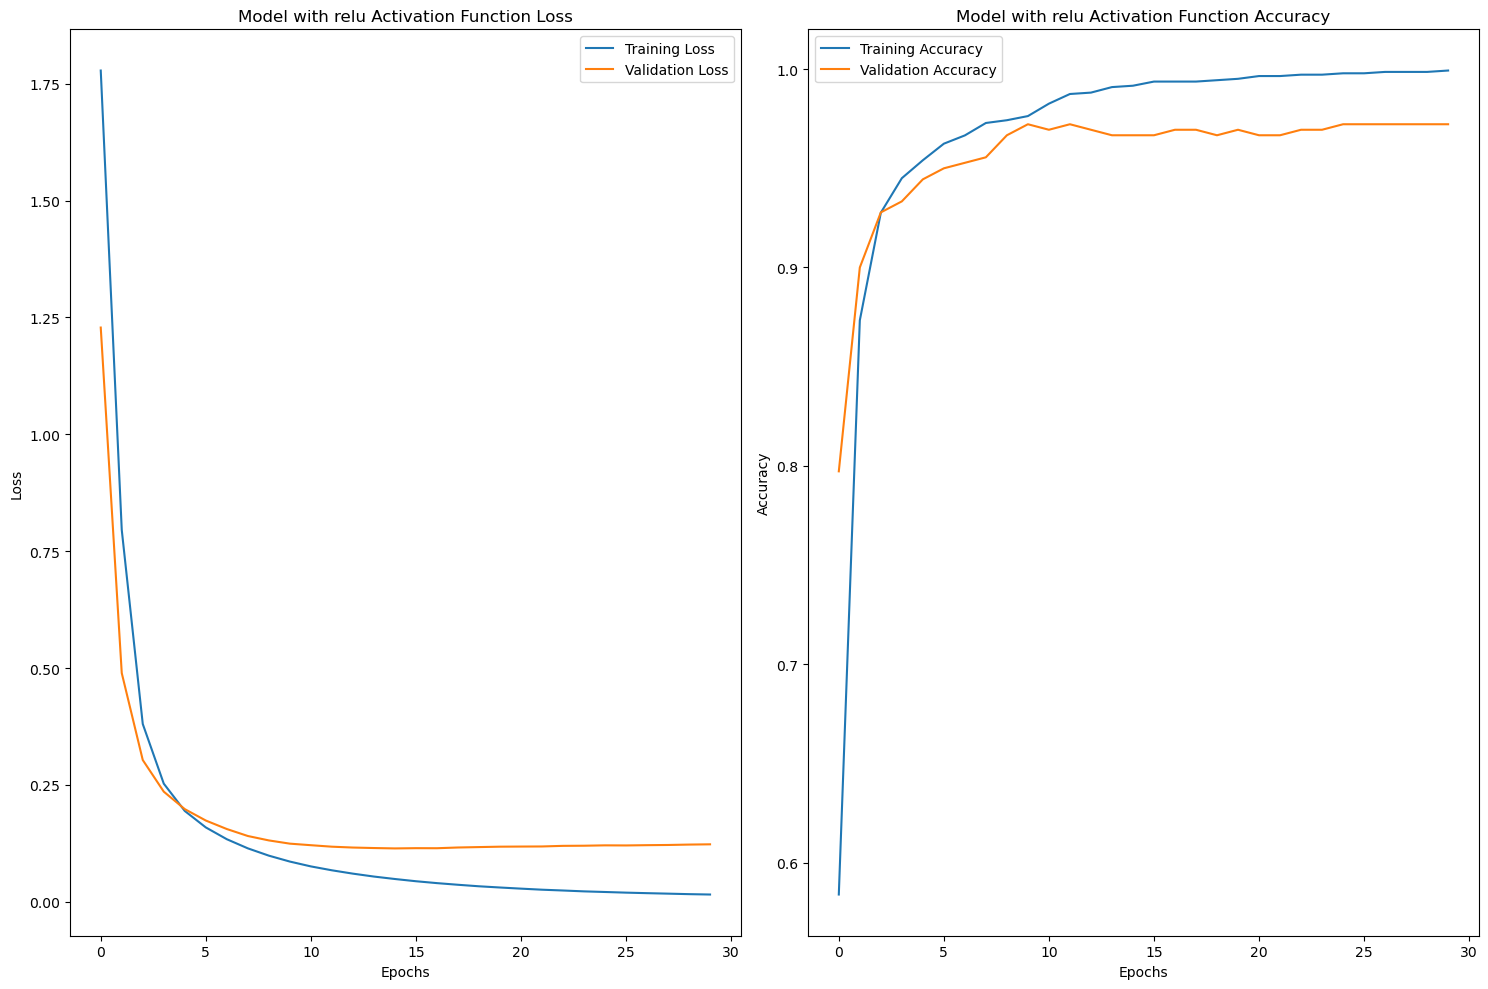

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9795 - loss: 0.0820 
tanh Test Accuracy: 0.9722


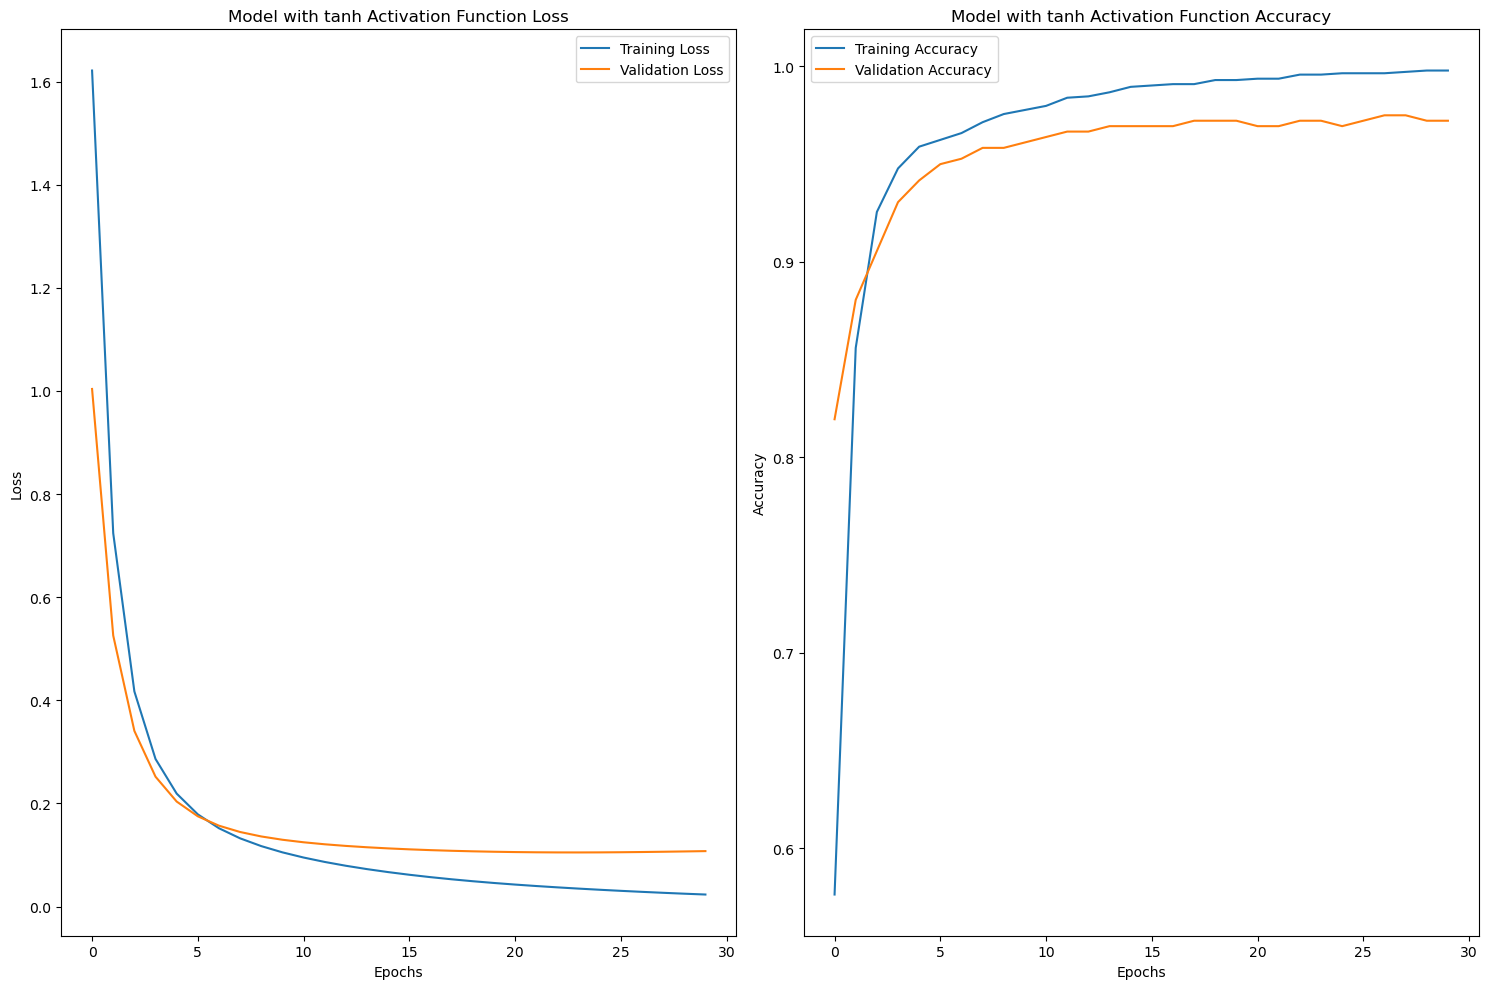

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9626 - loss: 0.1591 
sigmoid Test Accuracy: 0.9556


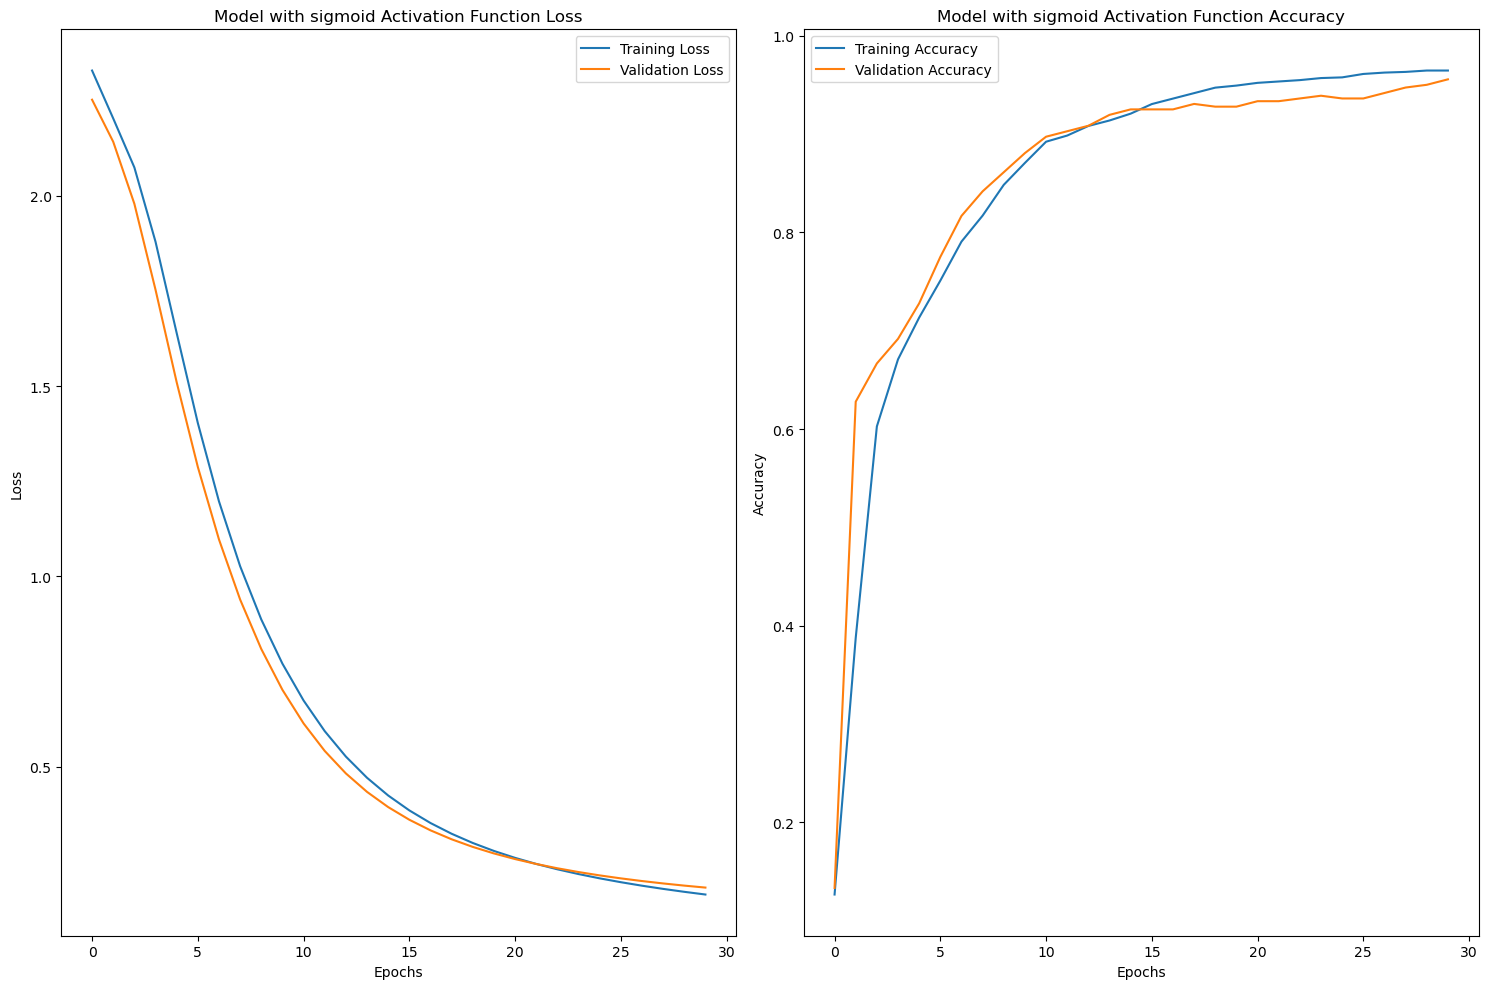

In [35]:
# visualize training and validation curves

# plot training and validation loss/accuracy curves
def plot_training_history(history, title=''):
    plt.figure(figsize=(15, 10))

    # plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # plot recall
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# evaluate models on testing data
test_accuracies = {}

for act in activation:
    test_loss, test_accuracy = all_models[act].evaluate(X_test, y_test, verbose=1)
    test_accuracies[act] = test_accuracy
    print(f"{act} Test Accuracy: {test_accuracy:.4f}")
 
    plot_training_history(all_histories[act], title=f'Model with {act} Activation Function')

Implement callbacks for monitoring and early stopping

In [27]:
# Implement EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',     # monitor validation loss
    patience=5,             # number of epochs with no improvement after which to stop
    min_delta=0.001,        # minimum change to qualify as improvement
    restore_best_weights=True   # restore model weights from the epoch with the best value
)

# Implement ModelCheckpoint callback to save the best model
checkpoint_filepath = './best_model.keras'
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_loss',
    save_best_only=True,        # save only when there's improvement
    mode='min',                 # direction is 'min' for loss
    verbose=1                   # show progres
)

# Implement TensorBoard callback for visualization
log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(
    log_dir=log_dir,
    histogram_freq=1            # update histograms every epoch
)

from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,        # Reduce learning rate by 80%
    patience=3,        # Wait 5 epochs of no improvement
    min_lr=0.000001,    # Don't go below this learning rate
    verbose=1          # Print when learning rate changes
)

# Combine all callbacks into a list
callbacks = [
    early_stopping,
    model_checkpoint,
    tensorboard_callback,
    reduce_lr
]

In [31]:
# Create an improved model with gradient problem mitigation strategies and train with callbacks
def create_improved_model(input_dim):
    model = Sequential()
    
    # First layer
    model.add(Input((input_dim,)))
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Dropout(0.2))  
    
    # Second layer
    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Dropout(0.2))
    
    # Output layer
    model.add(Dense(10, activation='softmax'))
    
    # Use Adam optimizer with gradient clipping
    optimizer = Adam(learning_rate=0.001, clipvalue=.5)
    
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Create and compile the improved model
improved_model = create_improved_model(X_train.shape[1])
improved_model.summary()

# Train the improved model with the callbacks
X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

improved_history = improved_model.fit(
    X_train_new, y_train_new,
    epochs=100,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=callbacks,
    verbose=1
)

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_84 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,954 (27.16 KB)

 Trainable params: 6,762 (26.41 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/100
 1/36 ━━━━━━━━━━━━━━━━━━━━ 29s 847ms/step - accuracy: 0.1250 - loss: 2.4568
Epoch 1: val_loss did not improve from 0.42493
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2081 - loss: 2.2500 - val_accuracy: 0.5833 - val_loss: 1.8329 - learning_rate: 0.0010
Epoch 2/100
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5938 - loss: 1.3974
Epoch 2: val_loss did not improve from 0.42493
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6693 - loss: 1.2416 - val_accuracy: 0.8021 - val_loss: 1.4991 - learning_rate: 0.0010
Epoch 3/100
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8125 - loss: 0.8970
Epoch 3: val_loss did not improve from 0.42493
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7932 - loss: 0.8780 - val_accuracy: 0.8681 - val_loss: 1.2220 - learning_rate: 0.0010
Epoch 4/100
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8438 - loss: 0.8085
Epoch 4: val_loss did not improve from 0.42493
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy

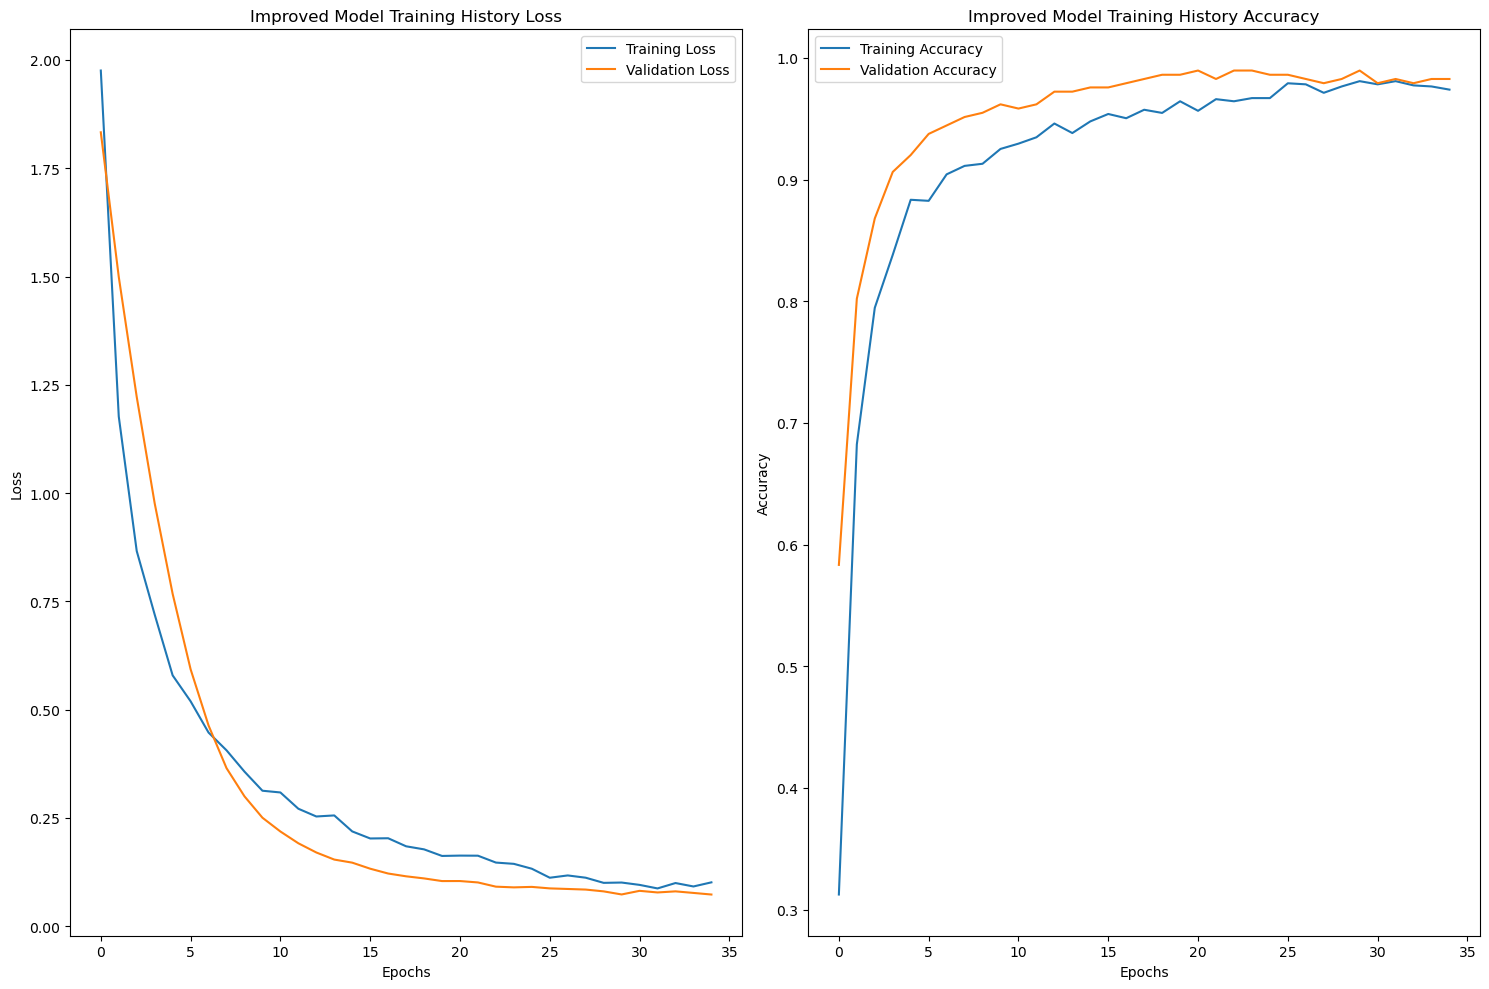

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9748 - loss: 0.0709  
Improved Model (Final) Test Accuracy: 0.9722
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9748 - loss: 0.0709 
Best Model (Checkpoint) Test Accuracy: 0.9722
Baseline Test Accuracy: 0.9722


In [37]:
# analyze training results

plot_training_history(improved_history, title='Improved Model Training History')

# Load the best model saved by ModelCheckpoint
best_model = tf.keras.models.load_model(checkpoint_filepath)

# Evaluate the final improved model
improved_test_loss, improved_test_accuracy = best_model.evaluate(X_test, y_test, verbose=1)
print(f"Improved Model (Final) Test Accuracy: {improved_test_accuracy:.4f}")

# Evaluate the best model (saved by checkpoint)
best_test_loss, best_test_accuracy = best_model.evaluate(X_test, y_test, verbose=1)
print(f"Best Model (Checkpoint) Test Accuracy: {best_test_accuracy:.4f}")

# Compare with baseline
print(f"Baseline Test Accuracy: {test_accuracies['relu']:.4f}")
# print(f"Early Stopping activated at epoch {len(improved_history.history['loss'])} of 100")

Even after implementing callsback for monitoring and early stopping, the accuracy of the baseline model is still as good as the improved model's accuracy.

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


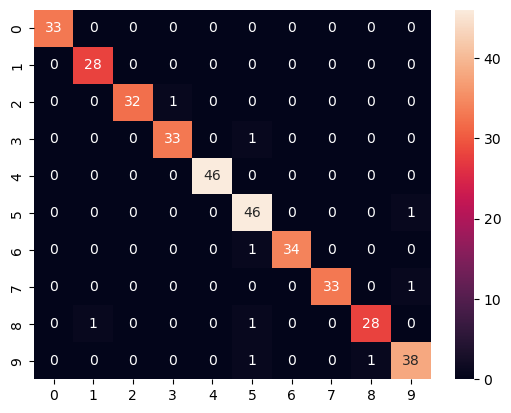

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions = improved_model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

Both the improved model and the best model from the checkpoint should have better performance than the baseline models with different activation functions. The confusion matrix will help visualize how well the model is performing across different classes (digits in this case).

This digit recognition system demonstrates the use of various techniques to improve model performance, including different activation functions, early stopping, model checkpointing, and advanced training strategies like gradient clipping and dropout. The confusion matrix will provide insights into specific areas where the model excels or struggles.